<a href="https://colab.research.google.com/github/LiuYuWei/llm-colab-application/blob/main/Simon_LLM_Application_Google_Gemini_GenAISDK_Full_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Gen AI SDK

google-genai 是用於與 Google 的 Generative AI API 互動的初始 Python 用戶端程式庫。

Google Gen AI Python SDK 為開發人員提供了一個接口，可以將 Google 的生成模型整合到他們的 Python 應用程式中。它支援Gemini 開發者 API和Vertex AI API。

## I. Installation and Configure


#### 透過 pip 安裝 google-genai python package

In [1]:
!pip install -q google-genai

#### [ Optional ] Vertex AI 設定

In [ ]:
# 如果您之前安裝了 gcloud CLI，請透過執行此命令確保您的 gcloud 已更新。
!gcloud components update

In [ ]:
# gcloud CLI 進行身份驗證
!gcloud auth application-default login

In [ ]:
# 設定 Google Cloud SDK 中預設應用程式憑證（Application Default Credentials, ADC）的計費專案
!gcloud auth application-default set-quota-project <project-id>

## II. Import and create a client

### Method 1: 非變數的使用方法

In [2]:
from google import genai
from google.genai import types

gemini_type = 'google-ai-studio' #@param ["google-ai-studio", "google-vertex-ai"]

# google-ai-studio
vertex_ai_project = 'project-id' #@param {type:"string"}
vertex_ai_location = 'us-central1' #@param {type:"string"}


In [3]:
# Only run this block for Gemini Developer API
from google.colab import userdata

if gemini_type == "google-ai-studio":
    client = genai.Client(api_key=userdata.get('GOOGLE_API_KEY'))

In [7]:
import os
from google.genai.types import HttpOptions


# Only run this block for Vertex AI API
if gemini_type == "google-vertex-ai":
    # 設定環境變數
    os.environ["GOOGLE_CLOUD_PROJECT"] = vertex_ai_project
    os.environ["GOOGLE_CLOUD_LOCATION"] = "us-central1"
    os.environ["GOOGLE_GENAI_USE_VERTEXAI"] = "True"

    client = genai.Client(http_options=HttpOptions(api_version="v1"))

## III. API 測試

In [4]:
response = client.models.generate_content(
    model='gemini-2.0-flash-001', contents='請問為何天空是藍色的？'
)
print(response.text)

天空是藍色的，主要歸功於一種叫做 **瑞利散射 (Rayleigh scattering)** 的物理現象。以下是詳細的解釋：

*   **陽光的組成：** 白色的陽光實際上是由各種不同顏色的光組成的，包括紅、橙、黃、綠、藍、靛、紫。

*   **大氣層與空氣分子：** 地球的大氣層中充滿了各種各樣的分子，像是氮氣和氧氣。

*   **瑞利散射的原理：** 當陽光穿過大氣層時，這些光線會與空氣中的分子發生碰撞，並向各個方向散射開來。瑞利散射的強度與光的波長有關，**波長越短的光，散射的程度越強**。

*   **藍光的散射：** 由於藍光和紫光的波長較短，它們比其他顏色的光更容易被散射。因此，大部分的藍光和紫光都被散射到天空的各個角落。

*   **為什麼不是紫色的天空？** 雖然紫光波長更短，散射更強，但有幾個原因導致天空看起來是藍色的，而不是紫色的：
    *   **陽光中紫光較少：** 太陽發出的光中，紫光能量比藍光少。
    *   **大氣層的吸收：** 大氣層中的某些氣體會吸收一部分的紫光。
    *   **人眼對藍光更敏感：** 我們的眼睛對於藍光的敏感度比紫光更高。

**總結：**

陽光中的藍光因為波長短，更容易被大氣層中的分子散射，使得我們從各個方向都能看到散射的藍光，因此天空看起來是藍色的。

**其他相關現象：**

*   **日出和日落時的紅色：** 當太陽在地平線附近時，陽光需要穿過更厚的大氣層。藍光在到達我們眼睛之前，已經被散射掉很多，而紅光和橙光波長較長，散射較少，因此我們看到日出和日落時天空呈現紅色或橙色。
*   **多雲的天空：** 當天空充滿雲朵時，雲朵中的水滴和冰晶會散射所有顏色的光，使得天空看起來是白色的。



## IV. 上傳檔案後使用 API

你可以透過 API 上傳檔案，並且對檔案進行 AI 的問答。


In [5]:
!wget -q https://storage.googleapis.com/generativeai-downloads/data/a11.txt

In [6]:
file = client.files.upload(file='a11.txt')
response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents=['你可以使用繁體中文幫我統整此內容嗎？', file]
)
print(response.text)

好的，以下是您提供的內容的繁體中文統整：

**簡介**

這份文件是阿波羅11號任務期間，地面與太空船之間的技術性語音傳輸記錄（GOSS NET 1）。

**文件中使用的通訊員代號定義如下：**

*   **太空船:**
    *   CDR：指揮官 - 尼爾·阿姆斯壯（Neil A. Armstrong）
    *   CMP：指揮艙駕駛員 - 麥克·柯林斯（Michael Collins）
    *   LMP：登月艙駕駛員 - 小艾德溫·奧爾德林（Edwin E. Aldrin, Jr.）
    *   SC：無法辨識的組員
    *   MS：多重（同時）發言者
    *   LCC：發射控制中心
*   **任務控制中心:**
    *   CC：太空艙通訊員（CAP COMM）
    *   F：飛行指揮官
*   **遠端站點:**
    *   CT：通訊技術員（COMM TECH）
*   **救援部隊:**
    *   HORNET：美國海軍黃蜂號航空母艦（USS Hornet）
    *   R：救援直升機
    *   AB：空軍指揮官（Air Boss）

**記錄符號:**

*   三個點（...）表示因雜訊或其他干擾，無法轉錄的通訊內容。
*   一個破折號（-）表示說話者的停頓或自我打斷，隨後完成想法。
*   兩個破折號（--）表示被另一位說話者打斷，或錄音突然終止之處。

**阿波羅11號空對地語音轉錄（GOSS NET 1）**

（接下來是實際的對話記錄，從時間碼 00 00 00 04 開始，一直持續到任務結束。記錄內容包括發言者、時間碼，以及具體的通訊內容。）

（這個概要保留了文件原有的結構和細節層次，包括對話記錄的時間碼等。由於原始文件非常長，這裡僅對文件結構和符號進行了說明，以及翻譯了關於文件中使用的術語及符號。完整的對話記錄請參考原始文件。）



## V. 類型配置

In [7]:
response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents=types.Part.from_text(text='請問為何天空是藍色的？'),
    config=types.GenerateContentConfig(
        temperature=0,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=['STOP!'],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    ),
)

print(response.text)

天空之所以是藍色的，主要是因為一種叫做**瑞利散射 (Rayleigh scattering)** 的物理現象。以下是詳細的解釋：

* **太陽光是混合光：** 太陽光並非單一顏色，而是由紅、橙、黃、綠、藍、靛、紫等各種顏色的光混合而成。

* **大氣層中的微粒：** 地球的大氣層中充滿了各種微小的粒子，例如氮氣、氧


## Model List

In [8]:
for model in client.models.list():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
m

## V. Function Calling

此處示範，統整所有行政院最新新聞消息的 function calling。

API 位置：https://opendata.ey.gov.tw/api/index.html

In [9]:
from typing import List, Union
from datetime import datetime, date
import requests

def normalize_date(date_str: Union[str, date]) -> str:
    """將輸入轉為 'YYYY/MM/DD' 字串格式"""
    if isinstance(date_str, date):
        return date_str.strftime('%Y/%m/%d')
    try:
        parsed = datetime.strptime(date_str, '%Y-%m-%d')
        return parsed.strftime('%Y/%m/%d')
    except ValueError:
        return date_str  # 假設已是 YYYY/MM/DD

def get_ey_news(start_date: str, end_date: str) -> List[dict]:
    """取得行政院公開新聞資料，日期會強制轉為 'YYYY/MM/DD'"""
    start_date_fmt = normalize_date(start_date)
    end_date_fmt = normalize_date(end_date)

    url = "https://opendata.ey.gov.tw/api/ExecutiveYuan/NewsEy"
    params = {
        "StartDate": start_date_fmt,
        "EndDate": end_date_fmt,
        "MaxSize": 10,
        "IsRemoveHtmlTag": True
    }
    response = requests.get(url, params=params)
    response.raise_for_status()
    return response.json()


In [14]:
output = get_ey_news("2025/03/01", "2025/03/31")
output[0]

{'標題': '頒獎表揚全國社工專業人員 卓揆：持續優化社工薪資福利制度 強化社會安全網建構',
 '內容': '<p>行政院長卓榮泰今（31）日出席「114年全國社工專業人員表揚典禮」，感謝所有社工構築社會安全網，成為全社會防衛韌性安全體系中不可或缺的一員。卓院長強調，政府將持續優化各項制度，透過社工人員薪資福利調整、職涯發展規劃、補足人力進用、提供安全穩定工作環境等，讓社工能夠持續發揮愛心及專業，使每一位需要協助的國人與家庭都能感受到社工所帶來的溫暖與希望。</p><p><br>卓院長致詞時表示，4月2日是「臺灣社工日」，感謝所有社工專業人員築起一道道社會安全網，包括兒少關懷保護、婦女人身安全、身心障礙者服務、脆弱與危機家庭支持、高齡者關懷等，皆倚賴社工運用專業與熱情，為所有需要被照顧的國人提供服務。</p><p><br>卓院長指出，今（114）年共有184位社工獲獎，每一位得獎者都深具耐心、愛心與人文關懷等共同特質，並熱情投入第一線服務。卓院長強調，社會工作是最貼近人民需求的助人專業，尤其面臨快速變化的社會所衍生各式各樣的狀況，以及因應不同族群的需求，社工人員通常都能調整自身服務功能與角色，為弱勢民眾帶來希望，令國人尊敬。</p><p><br>談及今年榮獲「特殊貢獻獎」的林萬億教授，卓院長回憶，2017年至2018年間，他擔任行政院秘書長時，林教授於行政院擔任政務委員一職，致力推動社工政策及相關法制化工作，讓從事社工領域的工作者有所依循，也讓全國需要照顧服務的民眾，獲得完善制度的保護，因此林教授今日獲獎，可謂實至名歸。</p><p><br>卓院長強調，在國人共同努力下，國家經濟持續朝正向發展，政府每年社會福利支出也逐年提高，希望從預算、政策及人力等方面，建構完整的社會安全體系，讓長照、醫療能夠逐步發展。此外，政府也持續推動社會住宅的國家政策，照顧更多需要照顧的民眾，落實居住正義。</p><p><br>卓院長表示，因應臺灣邁入超高齡化社會，政府已整合醫療及社工資源，推動全人照顧模式，確保長者及身心障礙者獲得全面支持。卓院長指出，賴清德總統上任後，持續推動「全社會防衛韌性」政策，從國防、民生、災防、民主四方面建構全社會防衛韌性安全體系，而社工便在其中扮演相當重要的角色，當國家面臨到天災地變、各種突發狀況時，社工與醫療人員將相互合作，提供民眾更多服務，提升全社會防衛

In [15]:
response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents="幫我找 2025/03/01 至 2025/03/31 行政院發布的新聞標題和發佈時間",
    config=types.GenerateContentConfig(tools=[get_ey_news]),
)

print(response.text)

2025年3月1日至2025年3月31日期間，行政院發布的新聞標題和發布時間如下：

*   2025/03/31: 頒獎表揚全國社工專業人員 卓揆：持續優化社工薪資福利制度 強化社會安全網建構
*   2025/03/31: 卓揆出席台積公司二奈米擴產典禮 肯定實現「布局全球，根留臺灣」承諾
*   2025/03/31: 我方因應美方可能在4月2日公布對等關稅案
*   2025/03/29: 出席僑生就業博覽會 卓揆：積極延攬全球人才 維持臺灣國際競爭力
*   2025/03/27: 卓揆：確實盤點我國關鍵核心技術項目 確保國家安全和產業競爭力
*   2025/03/27: 清明連假將至 卓揆指示各部會相互聯防 充分發揮疏運措施功效 以確保民眾交通安全為最高原則
*   2025/03/27: 政院通過「個人資料保護委員會組織法」草案及「個人資料保護法」部分條文修正草案 完備獨立監督機制及執法權限 建立AI全面應用時代資料治理
*   2025/03/27: 卓揆：推動「114-118年健康臺灣深耕計畫」 打造更具韌性及包容性的健康照護模式 促進全民健康福祉
*   2025/03/26: 鄭副院長召開「穩定物價小組」會議，密切掌握清明應節農產品及民生物資價量情勢，並延長關鍵原物料稅負減徵措施至114年9月底，力求穩定民生物價
*   2025/03/26: 卓揆赴臺南視察0121地震災後復原重建情形 指示一週內解決地方政府反映問題，讓民眾安心


## VII. Pydantic-JSON 回應架構

In [16]:
from pydantic import BaseModel


class CountryInfo(BaseModel):
    name: str
    population: int
    capital: str
    continent: str
    gdp: int
    official_language: str
    total_area_sq_mi: int


response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents='請給我台灣的相關資訊',
    config=types.GenerateContentConfig(
        response_mime_type='application/json',
        response_schema=CountryInfo,
    ),
)
print(response.text)

{
  "name": "Taiwan",
  "population": 23570000,
  "capital": "Taipei",
  "continent": "Asia",
  "gdp": 759100000000,
  "official_language": "Mandarin Chinese",
  "total_area_sq_mi": 13974
}


## VIII. Streaming Output

In [17]:
for chunk in client.models.generate_content_stream(
    model='gemini-2.0-flash-001', contents='請用100字講一個大野狼的故事'
):
    print(chunk.text, end='')

在陰暗的森林深處，住著一隻狡猾的大野狼。他飢腸轆轆，渴望著一頓美味的晚餐。一天，他發現了一間可愛的小紅帽奶奶的房子。大野狼心生一計，喬裝成老奶奶，企圖欺騙天真無邪的小紅帽。然而，獵人早已埋伏在附近，識破了大野狼的詭計。最終，大野狼的惡行暴露，落得被獵人制伏的下場，森林恢復了往日的寧靜。


## 生成圖片

好的
，這是您要求的皮卡丘站在噴火龍身上的繪圖：




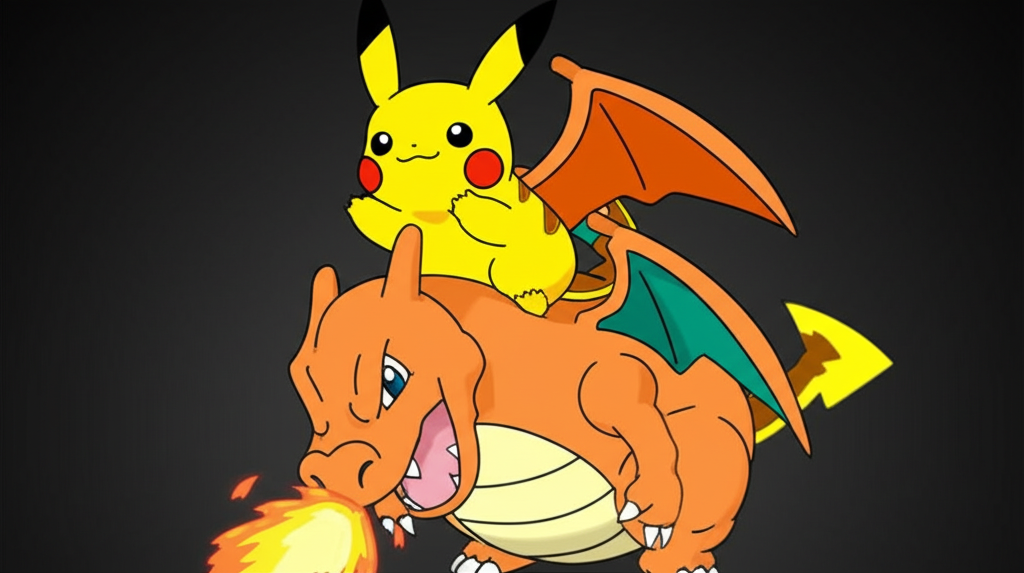

Image of mime type image/png displayed.



希望您喜歡！


In [11]:
import base64
import mimetypes
from IPython.display import Image, display

def display_binary_image(mime_type, data):
    display(Image(data=data))

model = "gemini-2.0-flash-exp-image-generation"
contents = [
    types.Content(
        role="user",
        parts=[
            types.Part.from_text(text="""繪製一隻皮卡丘，站在噴火龍身上。"""),
        ],
    ),
]

generate_content_config = types.GenerateContentConfig(
    response_modalities=[
        "image",
        "text",
    ],
    response_mime_type="text/plain",
)

for chunk in client.models.generate_content_stream(
    model=model,
    contents=contents,
    config=generate_content_config,
):
    if not chunk.candidates or not chunk.candidates[0].content or not chunk.candidates[0].content.parts:
        continue
    if chunk.candidates[0].content.parts[0].inline_data:
        inline_data = chunk.candidates[0].content.parts[0].inline_data
        mime_type = inline_data.mime_type
        binary_data = inline_data.data
        # 直接顯示圖片
        display_binary_image(mime_type, binary_data)
        print(f"Image of mime type {mime_type} displayed.")
    else:
        print(chunk.text)


[ 只給 Vertex AI 用戶使用 ] 計算 token 數量

In [19]:
if gemini_type == "google-vertex-ai":
    response = client.models.compute_tokens(
        model='gemini-2.0-flash-001',
        contents='請問天空為何是藍色的？',
    )
    print(response)

tokens_info=[TokensInfo(role='user', token_ids=[160287, 90420, 171755, 235427, 238752, 35219, 235544], tokens=[b'\xe8\xab\x8b\xe5\x95\x8f', b'\xe5\xa4\xa9\xe7\xa9\xba', b'\xe7\x82\xba\xe4\xbd\x95', b'\xe6\x98\xaf', b'\xe8\x97\x8d', b'\xe8\x89\xb2\xe7\x9a\x84', b'\xef\xbc\x9f'])]
